### NLP Assignment
* Name : Sandra Skaria
* Classification model simulation<br>
* Model - Bi-LSTM model to classify imbd text dataset

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [ ]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128

In [ ]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
196/196 [==============================] - 214s 1s/step - loss: 0.4640 - accuracy: 0.7743 - val_loss: 0.3153 - val_accuracy: 0.8670
Epoch 2/12
196/196 [==============================] - 215s 1s/step - loss: 0.2505 - accuracy: 0.9056 - val_loss: 0.3122 - val_accuracy: 0.8751
Epoch 3/12
196/196 [==============================] - 176s 898ms/step - loss: 0.1809 - accuracy: 0.9336 - val_loss: 0.3396 - val_accuracy: 0.8690
Epoch 4/12
196/196 [==============================] - 176s 897ms/step - loss: 0.1397 - accuracy: 0.9507 - val_loss: 0.4138 - val_accuracy: 0.8606
Epoch 5/12
196/196 [==============================] - 216s 1s/step - loss: 0.1082 - accuracy: 0.9634 - val_loss: 0.4992 - val_accuracy: 0.8568
Epoch 6/12
196/196 [==============================] - 216s 1s/step - loss: 0.1193 - accuracy: 0.9579 - val_loss: 0.4535 - val_accuracy: 0.8467
Epoch 7/12
196/196 [==============================] - 176s 899ms/step - loss: 0.0849 - accuracy: 0.9720 - val_loss: 0.4386 - val_accurac

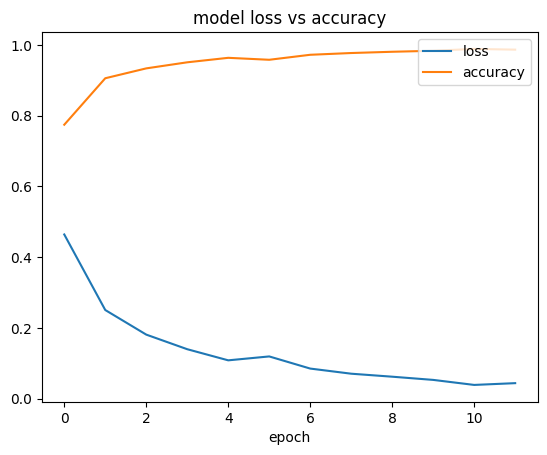

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()